In [53]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression


In [54]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Let's explore the top 5 rows of the df
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [55]:
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


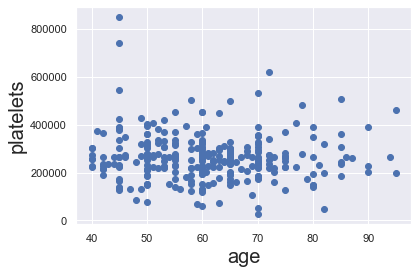

In [56]:
x1=data['age']
y=data['platelets']
plt.scatter(x1,y)
plt.xlabel('age',fontsize=20)
plt.ylabel('platelets',fontsize=20)
plt.show()

<AxesSubplot:xlabel='platelets'>

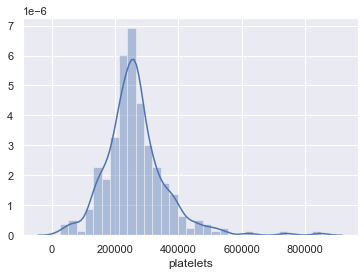

In [57]:
sns.distplot(data['platelets'])

In [58]:
q=data['platelets'].quantile(0.99)
data_1=data[data['platelets']<q]
data_1.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,60.903155,0.432432,578.682432,0.415541,38.047297,0.351351,258550.847128,1.395169,136.597973,0.652027,0.317568,130.047297,0.320946
std,11.865838,0.496253,971.139998,0.493650,11.815436,0.478201,85223.023588,1.039014,4.422270,0.477134,0.466319,77.453744,0.467631
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,211750.000000,0.900000,134.000000,0.000000,0.000000,72.750000,0.000000
50%,60.000000,0.000000,248.500000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000,202.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,543000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [59]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:xlabel='ejection_fraction'>

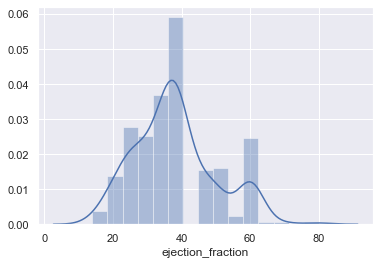

In [60]:
sns.distplot(data_1['ejection_fraction'])

<AxesSubplot:xlabel='serum_sodium'>

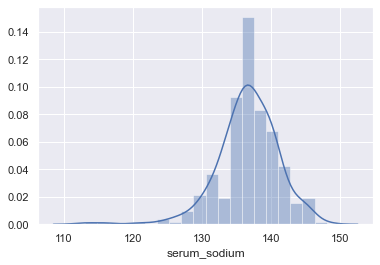

In [61]:
sns.distplot(data_1['serum_sodium'])

In [62]:
q=data_1['serum_sodium'].quantile(0.95)
data_2=data_1[data_1['serum_sodium']<q]
data_2.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,60.526193,0.428571,573.221429,0.417857,37.764286,0.350000,259181.045429,1.375607,136.121429,0.650000,0.317857,130.550000,0.317857
std,11.758527,0.495758,971.472780,0.494089,11.681318,0.477824,85338.580369,1.007014,4.050696,0.477824,0.466477,77.994837,0.466477
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,112.750000,0.000000,30.000000,0.000000,214500.000000,0.900000,134.000000,0.000000,0.000000,72.750000,0.000000
50%,60.000000,0.000000,247.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,116.000000,0.000000
75%,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,139.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,543000.000000,9.400000,143.000000,1.000000,1.000000,285.000000,1.000000


<AxesSubplot:xlabel='serum_sodium'>

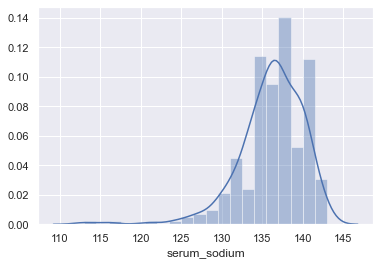

In [63]:
sns.distplot(data_2['serum_sodium'])

In [64]:
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [65]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_2['creatinine_phosphokinase'])

# Then we add it to our data frame
data_2['creatinine_phosphokinase'] = log_price
data_2

C:\Users\Admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.366470,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,8.969669,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,4.983607,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,4.709530,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,5.075174,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,4.634729,1,35,0,179000.00,0.9,136,1,1,270,0
294,62.0,0,4.110874,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,7.506592,0,38,0,270000.00,1.2,139,0,0,271,0
297,45.0,0,7.788626,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data_2.columns.values

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_2[['platelets','ejection_fraction','serum_sodium']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,10.306378,platelets
1,11.748552,ejection_fraction
2,19.908208,serum_sodium


In [69]:
data_with_dumies=pd.get_dummies( data_2,drop_first=True) 
data_with_dumies.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.366470,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,8.969669,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,4.983607,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,4.709530,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,5.075174,1,20,0,327000.00,2.7,116,0,0,8,1


In [70]:
data_with_dumies.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [71]:
targets = data_2['creatinine_phosphokinase']
inputs = data_2.drop(['creatinine_phosphokinase'],axis=1)

In [72]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [73]:
inputs_scaled = scaler.transform(inputs)


In [74]:
inputs_scaled

array([[ 1.23312409, -0.8660254 , -0.84722571, ..., -0.68261892,
        -1.62544848,  1.46494622],
       [-0.47081473, -0.8660254 , -0.84722571, ..., -0.68261892,
        -1.59975984,  1.46494622],
       [ 0.38115468, -0.8660254 , -0.84722571, ...,  1.46494622,
        -1.58691552,  1.46494622],
       ...,
       [-0.47081473, -0.8660254 , -0.84722571, ..., -0.68261892,
         1.8039845 , -0.68261892],
       [-1.32278413, -0.8660254 , -0.84722571, ...,  1.46494622,
         1.91958337, -0.68261892],
       [-0.89679943, -0.8660254 , -0.84722571, ...,  1.46494622,
         1.98380496, -0.68261892]])

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [76]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [77]:
y_hat = reg.predict(x_train)

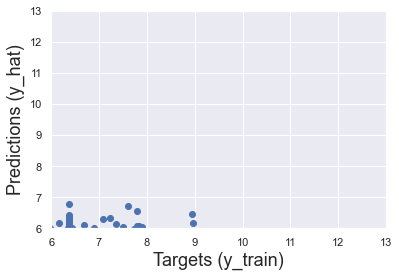

In [78]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

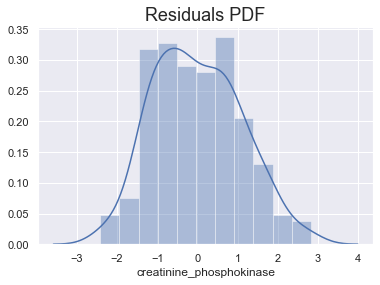

In [79]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

In [80]:
reg.score(x_train,y_train)


0.10955253964268297

In [81]:
reg.intercept_

5.63854581498238

In [82]:
reg.coef_

array([-0.11823224, -0.18523098, -0.0209863 , -0.08085208,  0.01102484,
       -0.03171869, -0.11342555,  0.0513619 ,  0.12857015, -0.18791863,
        0.16823907,  0.21218017])

In [83]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,-0.118232
1,anaemia,-0.185231
2,diabetes,-0.020986
3,ejection_fraction,-0.080852
4,high_blood_pressure,0.011025
5,platelets,-0.031719
6,serum_creatinine,-0.113426
7,serum_sodium,0.051362
8,sex,0.128570
9,smoking,-0.187919


In [85]:
y_hat_test = reg.predict(x_test)
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,300.617117
1,428.904536
2,598.966170
3,254.698591
4,501.617929


In [86]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,300.617117,NaN
1,428.904536,NaN
2,598.966170,NaN
3,254.698591,NaN
4,501.617929,NaN
5,189.540960,NaN
6,466.393276,246.0
7,292.489437,NaN
8,208.330772,NaN
9,238.612143,NaN


In [87]:
y_test = y_test.reset_index(drop=True)


y_test.head()

0    4.510860
1    6.366470
2    6.366470
3    5.720312
4    5.111988
Name: creatinine_phosphokinase, dtype: float64

In [88]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,300.617117,NaN,NaN,NaN
1,428.904536,NaN,NaN,NaN
2,598.966170,NaN,NaN,NaN
3,254.698591,NaN,NaN,NaN
4,501.617929,NaN,NaN,NaN
5,189.540960,NaN,NaN,NaN
6,466.393276,246.0,-220.393276,89.590763
7,292.489437,NaN,NaN,NaN
8,208.330772,NaN,NaN,NaN
9,238.612143,NaN,NaN,NaN


In [89]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
18,116.14,125.00,8.86,7.09
17,398.42,582.00,183.58,31.54
54,373.96,260.00,-113.96,43.83
6,466.39,246.00,-220.39,89.59
38,159.98,2656.00,2496.02,93.98
13,486.37,168.00,-318.37,189.50
51,330.15,91.00,-239.15,262.80
34,466.43,94.00,-372.43,396.20
20,265.13,52.00,-213.13,409.87
28,421.98,60.00,-361.98,603.30
